<a href="https://colab.research.google.com/github/alharidt16/text-Analysis/blob/main/UAS_TEXT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ujian Akhir Semester Mata Kuliah Text Analysis
- Nama : Al Haridt Mahmudi
- NIM  : 2008108010004

## Get Dataset
Data yang akan digunakan adalah komentar atau review dari pengguna aplikasi Threads

In [1]:
!pip install google_play_scraper
from google_play_scraper import Sort, reviews_all
import pandas as pd

In [2]:
result = reviews_all(
        'com.instagram.barcelona',
        sleep_milliseconds=0,
        lang='id',
        country='id',
        sort=Sort.NEWEST
    )

threads = pd.DataFrame.from_records(result)
threads = threads[['content', 'score' ]]

In [3]:
threads

,content,score
0,sementara,3
1,Bagus,5
2,seru juga ini apk,5
3,Zionisme,1
4,Tambahin vitur chat dong huft gabut bet cma bi...,5
...,...,...
5330,👍🏻👍🏻👍🏻,5
5331,Hiii. Aku pengguna tercepat,5
5332,Hello bruh,5
5333,"Baru mencobanya, Meta sedang berusaha bersaing...",4


In [4]:
data_review_threads= threads

In [5]:
data_review_threads

,content,score
0,sementara,3
1,Bagus,5
2,seru juga ini apk,5
3,Zionisme,1
4,Tambahin vitur chat dong huft gabut bet cma bi...,5
...,...,...
5330,👍🏻👍🏻👍🏻,5
5331,Hiii. Aku pengguna tercepat,5
5332,Hello bruh,5
5333,"Baru mencobanya, Meta sedang berusaha bersaing...",4


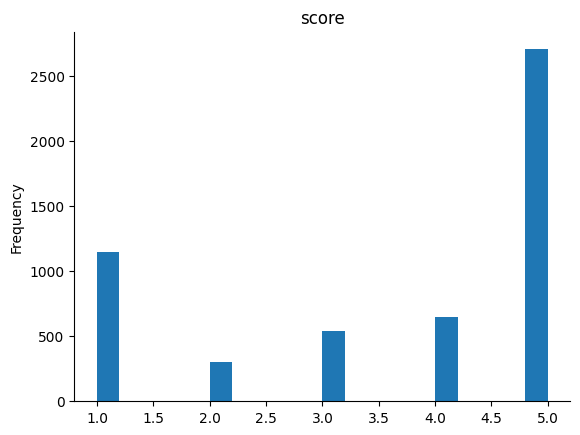

In [6]:
from matplotlib import pyplot as plt
threads['score'].plot(kind='hist', bins=20, title='score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
def sentiments(rating):
    if (rating == 5) or (rating == 4) :
        return "Positif"
    else :
        return "Negatif"
# Add sentiments to the data
data_review_threads["label"] = data_review_threads["score"].apply(sentiments)
data_review_threads

,content,score,label
0,sementara,3,Negatif
1,Bagus,5,Positif
2,seru juga ini apk,5,Positif
3,Zionisme,1,Negatif
4,Tambahin vitur chat dong huft gabut bet cma bi...,5,Positif
...,...,...,...
5330,👍🏻👍🏻👍🏻,5,Positif
5331,Hiii. Aku pengguna tercepat,5,Positif
5332,Hello bruh,5,Positif
5333,"Baru mencobanya, Meta sedang berusaha bersaing...",4,Positif


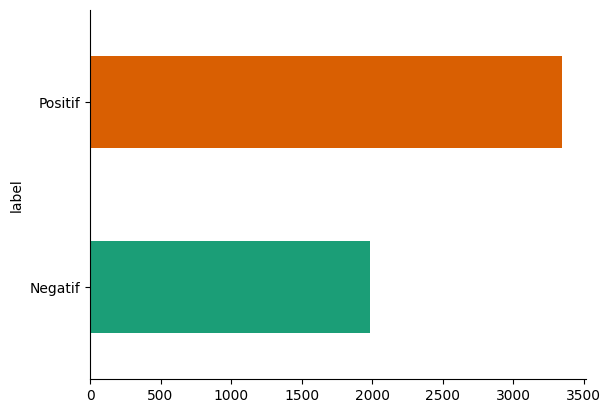

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
threads.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
data_review_threads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5335 entries, 0 to 5334
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  5335 non-null   object
 1   score    5335 non-null   int64 
 2   label    5335 non-null   object
dtypes: int64(1), object(2)
memory usage: 125.2+ KB


In [10]:
data_review_threads.isna().any()


content    False
score      False
label      False
dtype: bool

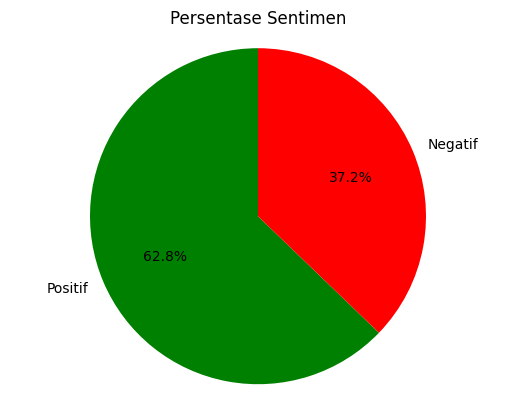

In [11]:
import matplotlib.pyplot as plt

# Menghitung jumlah sentimen positif, netral dan negatif
positif_count = data_review_threads[data_review_threads['label'] == 'Positif'].shape[0]
negatif_count = data_review_threads[data_review_threads['label'] == 'Negatif'].shape[0]

# Data untuk diagram lingkaran
labels = ['Positif', 'Negatif']
sizes = [positif_count, negatif_count]

# Warna
colors = ['green','red']

# Pengaturan plot
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Pengaturan tambahan
ax.axis('equal')  # Agar diagram lingkaran terlihat bulat

# Judul diagram
plt.title('Persentase Sentimen')

# Tampilkan diagram lingkaran
plt.show()

## Text PreProcessing
Prapemrosesan teks atau yang lebih dikenal dengan nama text preprocessing yaitu proses membersihkan data sebelum diolah nantinya. Pada tahapan ini terdapat 5 proses diantaranya:

## CLEANING

In [12]:
pd.set_option('display.max_columns', None)
data_review_threads=data_review_threads[['content', 'label']]
data_review_threads.head(20)

,content,label
0,sementara,Negatif
1,Bagus,Positif
2,seru juga ini apk,Positif
3,Zionisme,Negatif
4,Tambahin vitur chat dong huft gabut bet cma bi...,Positif
5,meski belum mengerti atau memahami cara menggu...,Positif
6,ok,Positif
7,𝒚𝒂,Positif
8,Mantap,Positif
9,Membantu Anda melakukan sesuatu,Positif


## CASE FOLDING
Proses case folding adalah proses mengubah seluruh huruf menjadi huruf kecil. Pada proses ini karakter-karakter 'A'-'Z' yang terdapat pada data diubah kedalam karakter 'a'-'z'.


In [13]:
import re
def  clean_text(df, text_field, new_text_field_name):
    data_review_threads[new_text_field_name] = data_review_threads[text_field].str.lower()
    data_review_threads[new_text_field_name] = data_review_threads[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    # remove numbers
    data_review_threads[new_text_field_name] = data_review_threads[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    return data_review_threads

In [14]:
data_review_threads['text_clean'] = data_review_threads['content'].str.lower()
data_review_threads['text_clean']
data_review_threads_clean = clean_text(data_review_threads, 'content', 'text_clean')
data_review_threads_clean.head(10)

,content,label,text_clean
0,sementara,Negatif,sementara
1,Bagus,Positif,bagus
2,seru juga ini apk,Positif,seru juga ini apk
3,Zionisme,Negatif,zionisme
4,Tambahin vitur chat dong huft gabut bet cma bi...,Positif,tambahin vitur chat dong huft gabut bet cma bi...
5,meski belum mengerti atau memahami cara menggu...,Positif,meski belum mengerti atau memahami cara menggu...
6,ok,Positif,ok
7,𝒚𝒂,Positif,
8,Mantap,Positif,mantap
9,Membantu Anda melakukan sesuatu,Positif,membantu anda melakukan sesuatu


## STOPWORD REMOVAL
Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Contoh stopword dalam bahasa Indonesia adalah emoticon “yang”, “dan”, “di”, “dari”, dll. Makna di balik penggunaan stopword yaitu dengan menghapus kata-kata yang memiliki informasi rendah dari sebuah teks, kita dapat fokus pada kata-kata penting sebagai gantinya.

In [15]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
data_review_threads_clean['text_StopWord'] = data_review_threads_clean['text_clean'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
data_review_threads_clean.head(20)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,label,text_clean,text_StopWord
0,sementara,Negatif,sementara,
1,Bagus,Positif,bagus,bagus
2,seru juga ini apk,Positif,seru juga ini apk,seru apk
3,Zionisme,Negatif,zionisme,zionisme
4,Tambahin vitur chat dong huft gabut bet cma bi...,Positif,tambahin vitur chat dong huft gabut bet cma bi...,tambahin vitur chat huft gabut bet cma bikin s...
5,meski belum mengerti atau memahami cara menggu...,Positif,meski belum mengerti atau memahami cara menggu...,mengerti memahami threads
6,ok,Positif,ok,ok
7,𝒚𝒂,Positif,,
8,Mantap,Positif,mantap,mantap
9,Membantu Anda melakukan sesuatu,Positif,membantu anda melakukan sesuatu,membantu


## TOKENIZING
Tokenizing adalah proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token. Didalam NLP, token diartikan sebagai “kata” meskipun tokenize juga dapat dilakukan pada paragraf maupun kalimat

In [16]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
data_review_threads_clean['text_tokens'] = data_review_threads_clean['text_StopWord'].apply(lambda x: word_tokenize(x))
data_review_threads_clean.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,content,label,text_clean,text_StopWord,text_tokens
0,sementara,Negatif,sementara,,[]
1,Bagus,Positif,bagus,bagus,[bagus]
2,seru juga ini apk,Positif,seru juga ini apk,seru apk,"[seru, apk]"
3,Zionisme,Negatif,zionisme,zionisme,[zionisme]
4,Tambahin vitur chat dong huft gabut bet cma bi...,Positif,tambahin vitur chat dong huft gabut bet cma bi...,tambahin vitur chat huft gabut bet cma bikin s...,"[tambahin, vitur, chat, huft, gabut, bet, cma,..."


## STEMMING
Stemming adalah proses pemetaan dan penguraian bentuk dari suatu kata menjadi bentuk kata dasarnya. Untuk melakukan stemming bahasa Indonesia kita dapat menggunakan library Python Sastrawi yang sudah kita siapkan di awal. Library Sastrawi menerapkan Algoritma Nazief dan Adriani dalam melakukan stemming bahasa Indonesia.

In [17]:
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [18]:
#-----------------STEMMING -----------------
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung=0

for document in data_review_threads_clean['text_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung+=1
    print(hitung,":",term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]


#script ini bisa dipisah dari eksekusinya setelah pembacaaan term selesai
data_review_threads_clean['text_steamindo'] = data_review_threads_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_review_threads_clean.head(20)

Streaming output truncated to the last 5000 lines.
578 : it : it
579 : kemudahan : mudah
580 : gampang : gampang
581 : hafal : hafal
582 : exskitif : exskitif
583 : terbaik : baik
584 : reborn : reborn
585 : lengkapi : lengkap
586 : muak : muak
587 : bang : bang
588 : elon : elon
589 : familiar : familiar
590 : netizen : netizen
591 : jd : jd
592 : org : org
593 : berinteraksi : interaksi
594 : sepi : sepi
595 : fb : fb
596 : add : add
597 : fiture : fiture
598 : schedule : schedule
599 : post : post
600 : pleaseee : pleaseee
601 : gaada : gaada
602 : fotur : fotur
603 : draftnya : draftnya
604 : ngetik : ngetik
605 : berjam : jam
606 : jam : jam
607 : hilang : hilang
608 : garagara : garagara
609 : hp : hp
610 : mati : mati
611 : berkali : kali
612 : kek : kek
613 : mood : mood
614 : minim : minim
615 : pitur : pitur
616 : deh : deh
617 : ubah : ubah
618 : format : format
619 : tanggalnya : tanggal
620 : mingguan : minggu
621 : tanggal : tanggal
622 : segmen : segmen
623 : explore : e

,content,label,text_clean,text_StopWord,text_tokens,text_steamindo
0,sementara,Negatif,sementara,,[],
1,Bagus,Positif,bagus,bagus,[bagus],bagus
2,seru juga ini apk,Positif,seru juga ini apk,seru apk,"[seru, apk]",seru apk
3,Zionisme,Negatif,zionisme,zionisme,[zionisme],zionisme
4,Tambahin vitur chat dong huft gabut bet cma bi...,Positif,tambahin vitur chat dong huft gabut bet cma bi...,tambahin vitur chat huft gabut bet cma bikin s...,"[tambahin, vitur, chat, huft, gabut, bet, cma,...",tambahin vitur chat huft gabut bet cma bikin s...
5,meski belum mengerti atau memahami cara menggu...,Positif,meski belum mengerti atau memahami cara menggu...,mengerti memahami threads,"[mengerti, memahami, threads]",erti paham threads
6,ok,Positif,ok,ok,[ok],ok
7,𝒚𝒂,Positif,,,[],
8,Mantap,Positif,mantap,mantap,[mantap],mantap
9,Membantu Anda melakukan sesuatu,Positif,membantu anda melakukan sesuatu,membantu,[membantu],bantu


In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


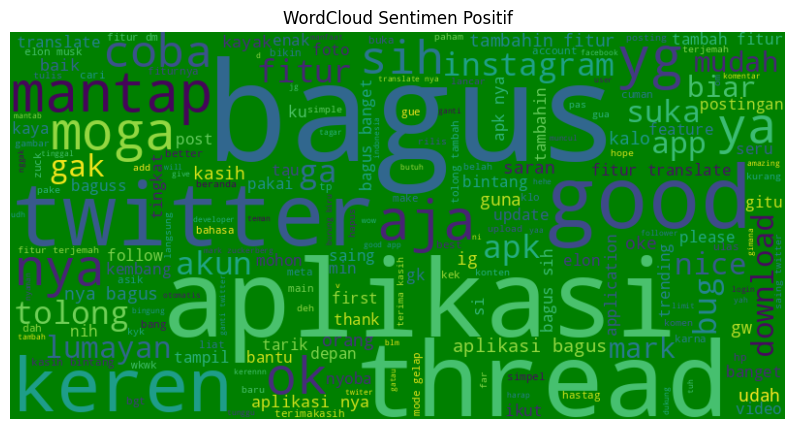

In [20]:
# Menggabungkan semua teks dengan sentimen positif menjadi satu string
text_positive = ' '.join(data_review_threads_clean[data_review_threads_clean['label'] == 'Positif']['text_steamindo'])


# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='green').generate(text_positive)

# Plot WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentimen Positif')
plt.show()

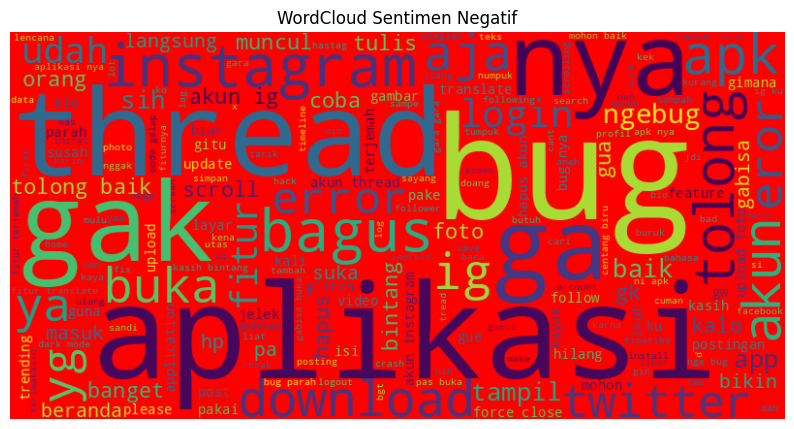

In [21]:
# Menggabungkan semua teks dengan sentimen negatif menjadi satu string
text_positive = ' '.join(data_review_threads_clean[data_review_threads_clean['label'] == 'Negatif']['text_steamindo'])


# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='red').generate(text_positive)

# Plot WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentimen Negatif')
plt.show()

# SPLIT DATA

memecah data test 20% dari keseluruhan data
membagi data Anda menjadi set pelatihan dan set pengujian. Set pelatihan digunakan untuk melatih model Naive Bayes, sedangkan set pengujian digunakan untuk menguji kinerja model.

In [22]:
#disini kita importkan library re, kemudian kita lakukan praproses
import re
def praproses(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)()(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

In [23]:
#membagi data menjadi data training dan testing dengan test_size = 0.20 dan random state nya 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_review_threads_clean['text_steamindo'], data_review_threads_clean['label'],
                                                    test_size = 0.20,
                                                    random_state = 0)

In [24]:
#PEMBOBOTAN
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4268,)
(4268,)
(1067,)
(1067,)


In [26]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [27]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [28]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(tfidf_train, y_train)

MultinomialNB()

In [29]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [30]:
y_pred = nb.predict(tfidf_test)

# Akurasi

In [31]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print("MultinomialNB Accuracy:", accuracy_score(y_test,predicted))
print("MultinomialNB Precision:", precision_score(y_test,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB Recall:", recall_score(y_test,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB f1_score:", f1_score(y_test,predicted, average="binary", pos_label="Negatif"))

print(f'confusion_matrix:\n {confusion_matrix(y_test, predicted)}')
print('====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))

# Load dataset
#data_clean = pd.read_csv('/kaggle/working/hasil_TextPreProcessing_treads.csv')

#


MultinomialNB Accuracy: 0.795688847235239
MultinomialNB Precision: 0.7815126050420168
MultinomialNB Recall: 0.665871121718377
MultinomialNB f1_score: 0.7190721649484535
confusion_matrix:
 [[279 140]
 [ 78 570]]

              precision    recall  f1-score   support

     Negatif       0.78      0.67      0.72       419
     Positif       0.80      0.88      0.84       648

    accuracy                           0.80      1067
   macro avg       0.79      0.77      0.78      1067
weighted avg       0.79      0.80      0.79      1067



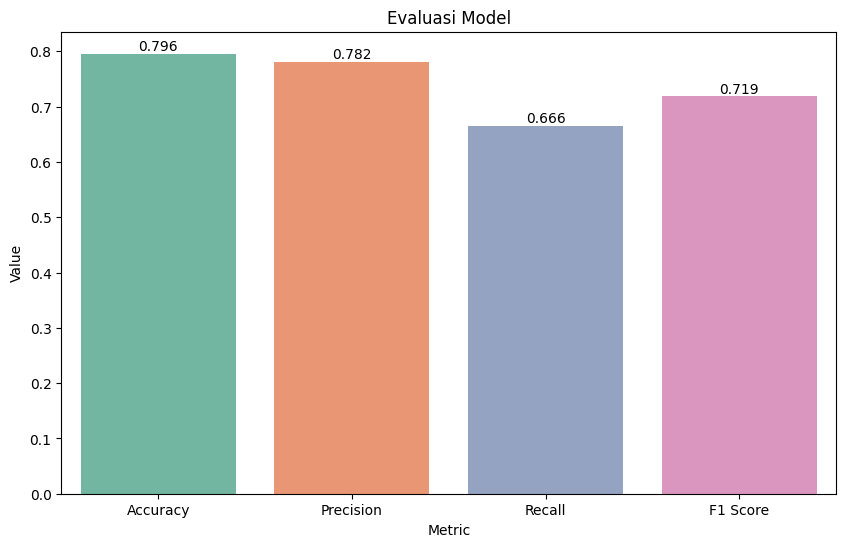

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Metrik evaluasi
accuracy = accuracy_score(y_test, predicted)
precision = precision_score(y_test, predicted, average="binary", pos_label="Negatif")
recall = recall_score(y_test, predicted, average="binary", pos_label="Negatif")
f1 = f1_score(y_test, predicted, average="binary", pos_label="Negatif")

# Menyimpan metrik evaluasi dalam sebuah DataFrame
metrics_df = pd.DataFrame({'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                           'Value': [accuracy, precision, recall, f1]})

# Membuat grafik batang
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', data=metrics_df, palette='Set2')
plt.title('Evaluasi Model')
plt.xlabel('Metric')
plt.ylabel('Value')

# Menampilkan nilai di atas setiap batang
for i, value in enumerate(metrics_df['Value']):
    plt.text(i, value, round(value, 3), ha='center', va='bottom')

# Tampilkan grafik
plt.show()

# KESIMPULAN
Berdasarkan Hasil perhitungan mengenai analisis sentimen Review Aplikasi threads intagram di playsotre dengan metode Bayes Classifier diperoleh kesimpulan yaitu metode  Naive Bayes Mampu Melakukan Klasifikasi komentar secara otomatis dengan bahasapemrograman python. Selain itu, Analisis sentimen
terhadap review pengguna aplikasi threads dengan metode Naive Bayes dengan nilai akurasi 79%